In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime as dt 
import os 

In [3]:
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline 

In [7]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'afmhot' , font_scale = 1.1,
             rc = {'figure.figsize' : (5 , 5)})

In [10]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [12]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


### Q. 1) Show the number of Confirmed, Deaths and Recovered cases in each Region.

In [13]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [15]:
df.groupby('Region')[['Confirmed','Deaths','Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


### Q. 2) Remove all the records where the Confirmed Cases is Less Than 10.

In [18]:
df.drop(df[df['Confirmed'] < 10].index , axis = 0 , inplace = True )

In [19]:
df[df['Confirmed'] < 10 ]

,Date,State,Region,Confirmed,Deaths,Recovered


In [20]:
df.reset_index(drop = True , inplace = True)

### Q. 3) In which Region, maximum number of Confirmed cases were recorded ?

In [26]:
group = df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head()
group.to_frame().T

Region,US,Spain,Italy,France,UK
Confirmed,1039909,236899,203591,166536,166432


<AxesSubplot:xlabel='Region', ylabel='Confirmed'>

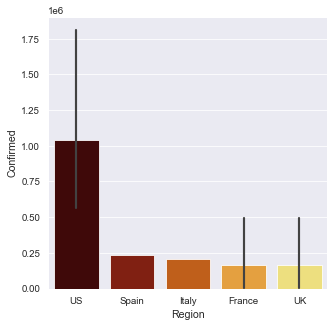

In [29]:
sns.barplot(data = df[df['Region'].isin(group.index)] , x = 'Region' , y = 'Confirmed'
            , estimator = np.sum , order = group.index)

### Q. 4) In which Region, minimum number of Deaths cases were recorded ?

In [37]:
df.groupby('Region')['Deaths'].min().sort_values().head(5).to_frame().T

Region,Denmark,Eritrea,Mongolia,Cambodia,Mozambique
Deaths,0,0,0,0,0


### Q. 5) How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

In [43]:
df['Date'].value_counts()

2020-04-29    304
Name: Date, dtype: int64

In [46]:
df['Region'].value_counts().loc['India']

1

In [50]:
df[(df['Date'] <= '2020-04-29') & (df['Region'] == 'India')][['Confirmed','Deaths','Recovered']]

,Confirmed,Deaths,Recovered
73,33062,1079,8437


### Q. 6-A ) Sort the entire data wrt No. of Confirmed cases in ascending order.

In [51]:
df.sort_values(by = 'Confirmed')

,Date,State,Region,Confirmed,Deaths,Recovered
151,2020-04-29,NaN,Suriname,10,1,8
69,2020-04-29,NaN,Holy See,10,0,2
58,2020-04-29,NaN,Gambia,10,1,8
301,2020-04-29,Yukon,Canada,11,0,0
206,2020-04-29,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
56,2020-04-29,NaN,France,165093,24087,48228
163,2020-04-29,NaN,UK,165221,26097,0
79,2020-04-29,NaN,Italy,203591,27682,71252
148,2020-04-29,NaN,Spain,236899,24275,132929


### Q. 6-B ) Sort the entire data wrt No. of Recovered cases in descending order.

In [52]:
df.sort_values(by = 'Recovered' , ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
148,2020-04-29,NaN,Spain,236899,24275,132929
60,2020-04-29,NaN,Germany,161539,6467,120400
75,2020-04-29,NaN,Iran,93657,5957,73791
79,2020-04-29,NaN,Italy,203591,27682,71252
218,2020-04-29,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
247,2020-04-29,Nevada,US,4934,230,0
246,2020-04-29,Nebraska,US,3851,56,0
244,2020-04-29,Montana,US,451,16,0
243,2020-04-29,Missouri,US,7660,338,0


In [58]:
df.isnull().sum()

Date           0
State        174
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

<AxesSubplot:>

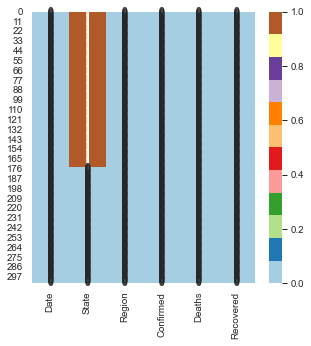

In [62]:
sns.heatmap(df.isnull() , cmap = 'Paired' , annot=True)